In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# Arranging dataset

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=25

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
       "/content/drive/MyDrive/Oncoknow/Cancer /Cancer_Dataset",
       shuffle = True,
       image_size = (IMAGE_SIZE,IMAGE_SIZE),
       batch_size = BATCH_SIZE
)

Found 3316 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['CLL case lymphocytes', 'Normal lymphocytes']

#Exploring data

In [ ]:
 for image_batch,labels_batch in dataset.take(1):
        print(image_batch.shape)
        print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1]


# visualizing images

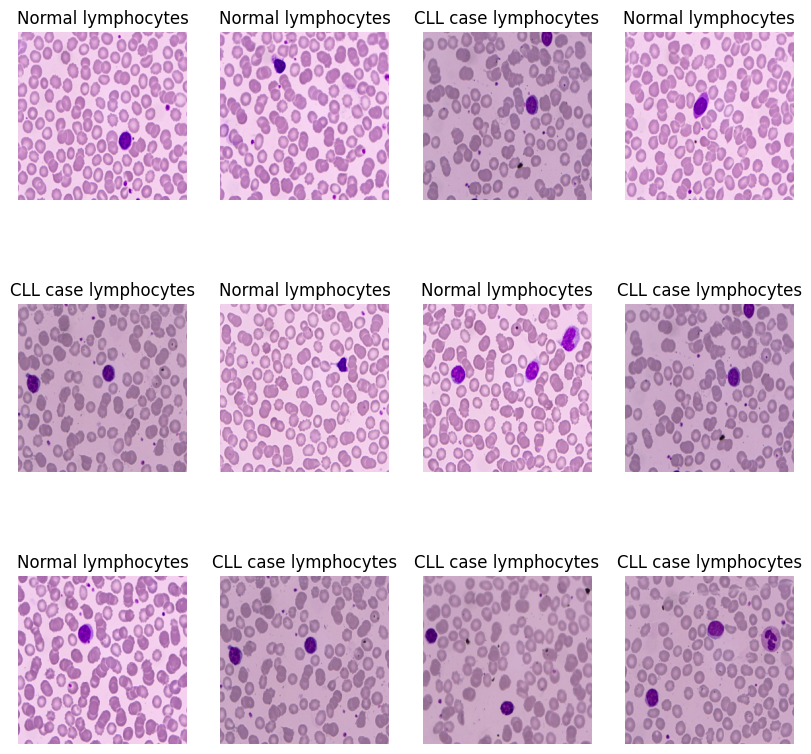

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

# Train Test Split (spliting data)

In [ ]:

"""80% ==> Training
20% ==> Test
      10% ==> Validation
      10% ==> Test
      """

'80% ==> Training\n20% ==> Test\n      10% ==> Validation\n      10% ==> Test\n      '

In [ ]:
train_size = 0.8
len(dataset)*train_size

83.2

In [ ]:
train_ds=dataset.take(83)
len(train_ds)

83

In [ ]:
test_ds=dataset.skip(83)
len(test_ds)

21

In [ ]:
val_size = 0.1
len(dataset)*val_size

10.4

In [ ]:
val_ds=test_ds.take(10)
len(val_ds)

10

In [ ]:
test_ds=test_ds.skip(10)
len(test_ds)

11

# Data Augmentation

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# converting image into numpy array
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.8039216  0.67058825 0.8       ]
  [0.8030775  0.6697442  0.79915595]
  [0.8011872  0.66904104 0.79607844]
  ...
  [0.7366572  0.57893676 0.7648436 ]
  [0.71964467 0.5760938  0.75767314]
  [0.7170236  0.56955117 0.7456618 ]]

 [[0.8039216  0.67058825 0.8       ]
  [0.80139846 0.66806513 0.7974769 ]
  [0.80030656 0.6708948  0.7924634 ]
  ...
  [0.63851815 0.5165053  0.689583  ]
  [0.61724246 0.50423694 0.67642593]
  [0.616342   0.5033365  0.6755255 ]]

 [[0.8033242  0.6699909  0.79940265]
  [0.8025657  0.67315394 0.79472256]
  [0.80621904 0.6768073  0.79053277]
  ...
  [0.60125554 0.49479106 0.6555754 ]
  [0.59607846 0.49411765 0.64705884]
  [0.612048   0.48742336 0.6420956 ]]

 ...

 [[0.8031021  0.6736903  0.79525894]
  [0.7902497  0.66083795 0.78240657]
  [0.80362254 0.6742108  0.7957794 ]
  ...
  [0.8114657  0.6742108  0.80362254]
  [0.8117647  0.6745098  0.8039216 ]
  [0.8117647  0.6745098  0.8039216 ]]

 [[0.80615807 0.6767463  0.7983149 ]
  [0.80232394 0.6729122  0.7944808 ]


In [ ]:
# image normalization and scalling of image.
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
# image normalization and scalling of image
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building

# Build and train a CNN model

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(4,4),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 123, 123, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 61, 61, 64)          0         
 g2D)                                                 

In [ ]:
# model compilation
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/25
83/83 [==============================] - 385s 977ms/step - loss: 0.6842 - accuracy: 0.5889 - val_loss: 0.6762 - val_accuracy: 0.5906
Epoch 2/25
83/83 [==============================] - 6s 70ms/step - loss: 0.6765 - accuracy: 0.5806 - val_loss: 0.6427 - val_accuracy: 0.5906
Epoch 3/25
83/83 [==============================] - 6s 68ms/step - loss: 0.6183 - accuracy: 0.6758 - val_loss: 0.4656 - val_accuracy: 0.8188
Epoch 4/25
83/83 [==============================] - 6s 69ms/step - loss: 0.1168 - accuracy: 0.9725 - val_loss: 0.0972 - val_accuracy: 0.9906
Epoch 5/25
83/83 [==============================] - 6s 68ms/step - loss: 0.0599 - accuracy: 0.9883 - val_loss: 0.0517 - val_accuracy: 0.9906
Epoch 6/25
83/83 [==============================] - 6s 69ms/step - loss: 0.0557 - accuracy: 0.9891 - val_loss: 0.0498 - val_accuracy: 0.9906
Epoch 7/25
83/83 [==============================] - 6s 70ms/step - loss: 0.0552 - accuracy: 0.9891 - val_loss: 0.0493 - val_accuracy: 0.9906
Epoch 8/25

# Plot training history on graph

In [ ]:
len(test_ds)

11

In [ ]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 49s 85ms/step - loss: 0.0356 - accuracy: 0.9941


In [ ]:
scores

[0.0355994887650013, 0.9941176176071167]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

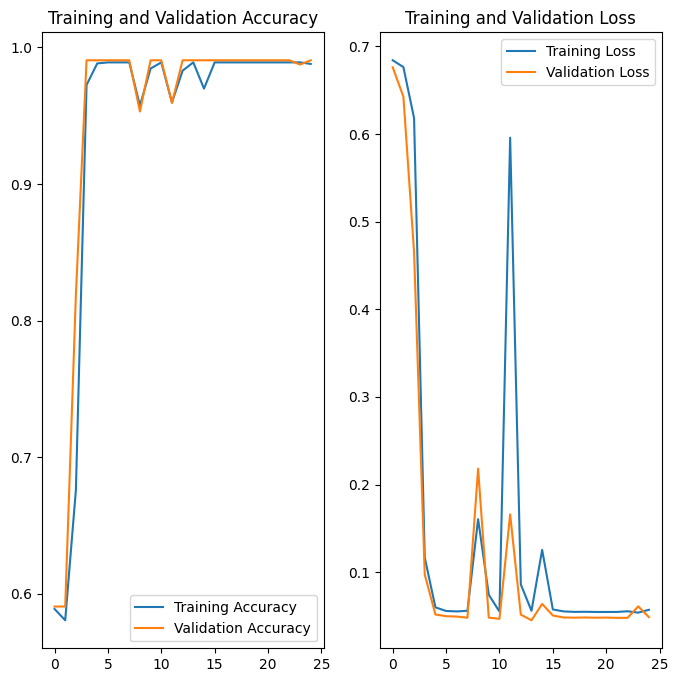

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Pridiction on sample image

In [ ]:
'''import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label :",class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",np.argmax(batch_prediction[0]))'''

'import numpy as np\nfor image_batch,labels_batch in test_ds.take(1):\n    first_image = image_batch[0].numpy().astype("uint8")\n    print("First image to predict")\n    plt.imshow(first_image)\n    print("Actual Label :",class_names[labels_batch[0].numpy()])\n\n    batch_prediction = model.predict(image_batch)\n    print("Predicted Label:",np.argmax(batch_prediction[0]))'

# Creating a function to predict

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch of images

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


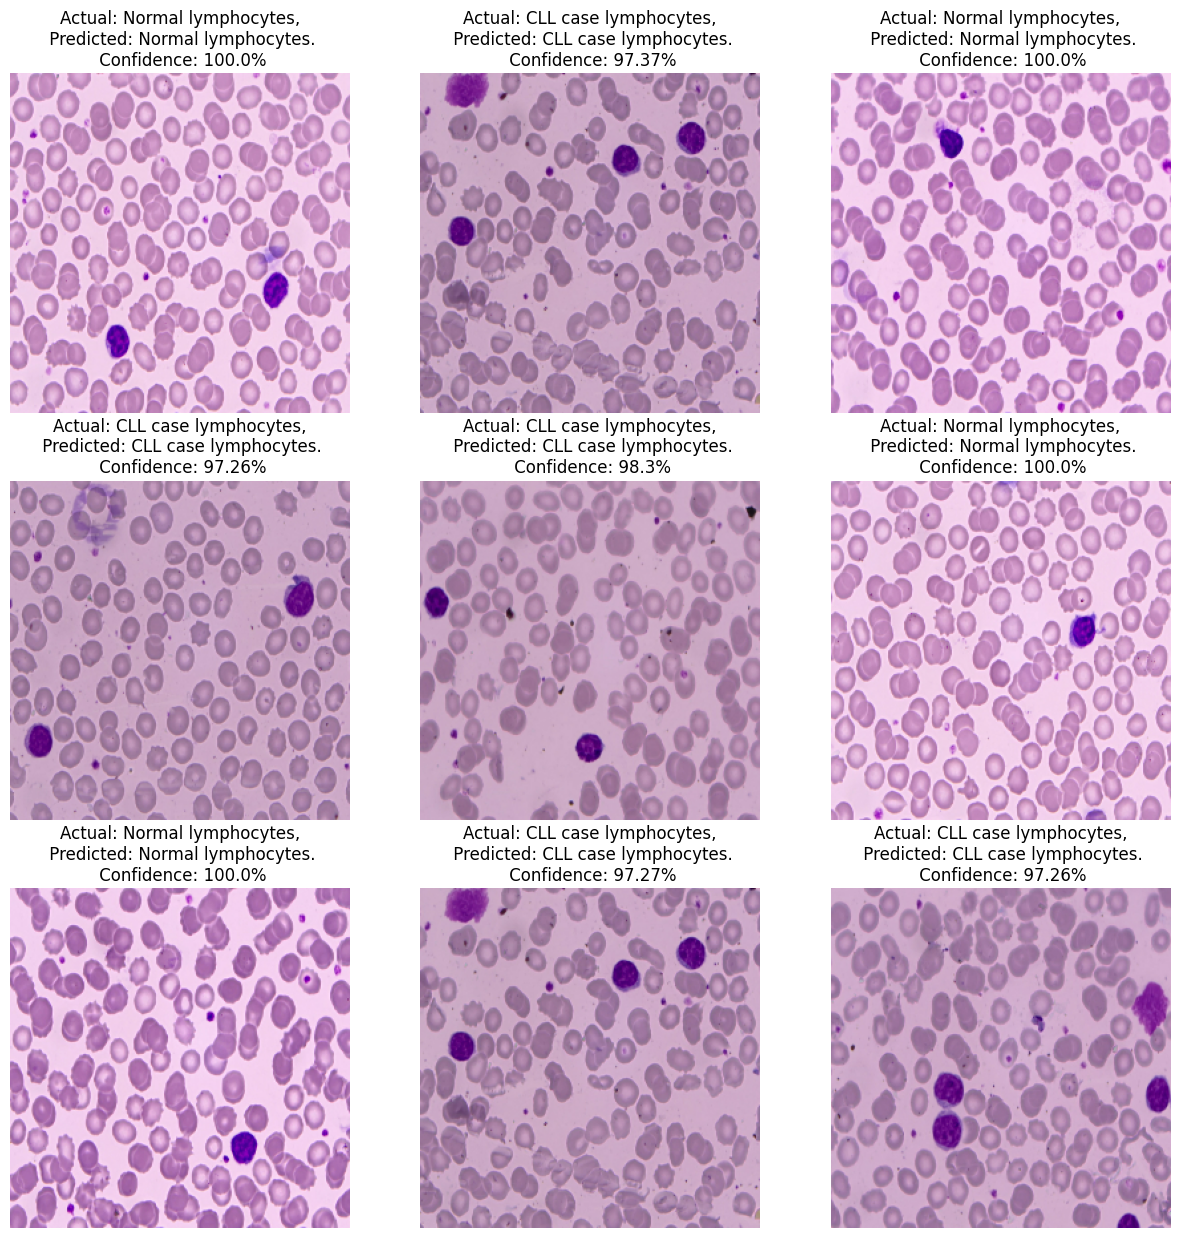

In [ ]:
import numpy as np
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

#Saving model

In [ ]:
import pickle

# Save necessary objects to a dictionary
pickle_data = {
    'model': model,
    'class_names': class_names,
    'resize_and_rescale': resize_and_rescale,
    'data_augmentation': data_augmentation,
}

# Save the dictionary to a pickle file
with open('/content/drive/MyDrive/Oncoknow/Cancer /model_data_2.pkl', 'wb') as file:
    pickle.dump(pickle_data, file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')